# ML1_Pipeline + Model

Ce notebook est en plusieurs étapes :
1. Comment charger et préparer les données
2. Comment utiliser correctement train_test_split
3. Comment créer des pipelines de prétraitement
4. Comment implémenter et évaluer un modèle de régression

## Objectif
Prédire l'année de plantation des arbres en utilisant les bonnes pratiques de Machine Learning.

## 1. Import des bibliothèques nécessaires et chargement des données.

Nous utilisons plusieurs bibliothèques essentielles :
- pandas et numpy : pour la manipulation des données
- sklearn : pour le Machine Learning
- matplotlib : pour la visualisation

In [3]:
# Les libraries nécessaires.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_arbres = pd.read_csv('ESP_PUBLIC.IDENTITE_ARBRE.csv')

print("tete du dataframe des arbres :")
data_arbres.head()

tete du dataframe des arbres :


,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,43866,ESP40237,ESP40237,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7209090239891..."
1,38181,ESP38129,ESP38129,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7048112482231..."
2,38182,ESP38130,ESP38130,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.704875754357,..."
3,38183,ESP38131,ESP38131,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7049488370901..."
4,38184,ESP38132,ESP38132,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7050118332264..."


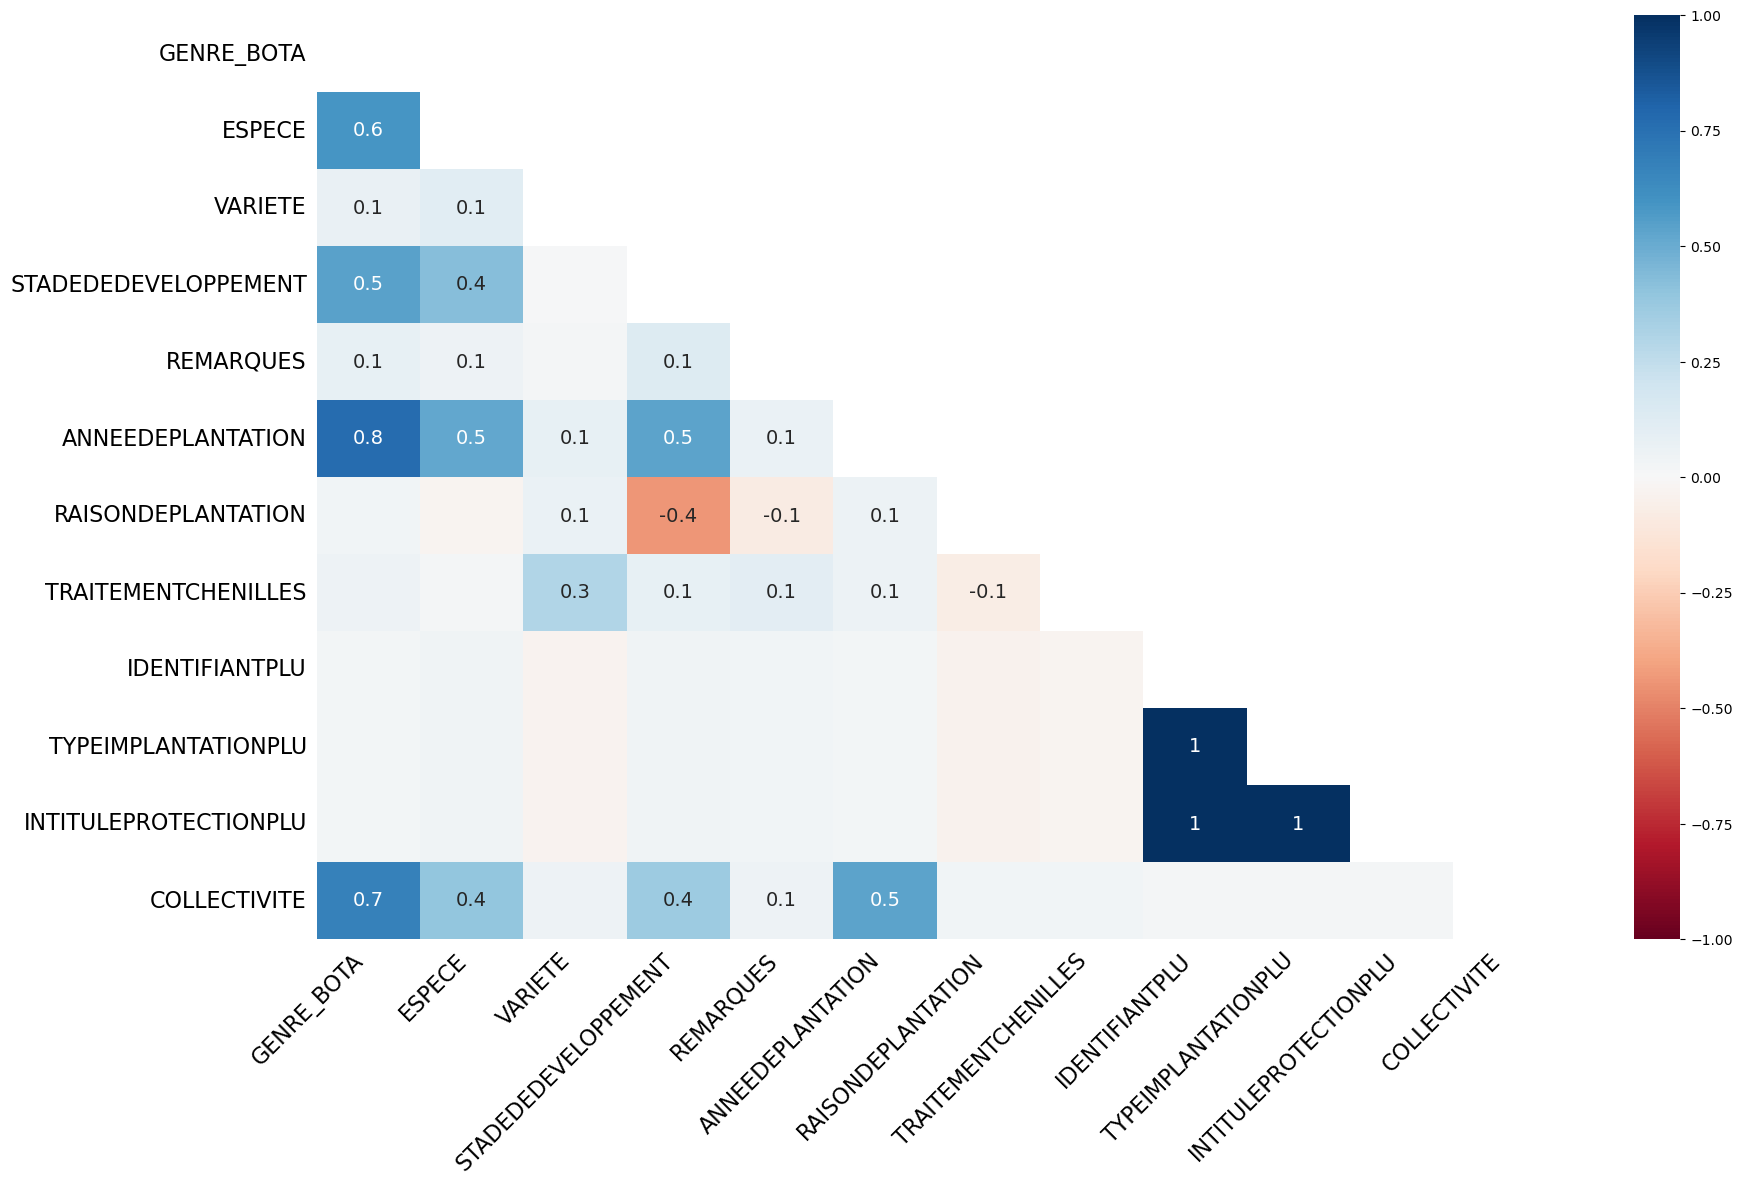

In [4]:
import missingno as msno

msno.heatmap(data_arbres)
plt.show()

Nous chargeons les données depuis le fichier pickle qui contient notre dataset nettoyé.

In [8]:
# Chargement des données depuis le fichier pickle

with open("df_trees.pkl", "rb") as f:
    df_clean = pd.read_pickle(f)
df_clean = pd.read_pickle("df_trees.pkl")
print(df_clean.head())

    ADR_SECTEUR GENRE_BOTA  ANNEEDEPLANTATION              COLLECTIVITE  \
12            2      Pinus               1970         Ville de Grenoble   
15            2      Pinus               1970         Ville de Grenoble   
16            2    Populus               1970         Ville de Grenoble   
18            4  Diospyros               2018         Ville de Grenoble   
22            5        NaN               2016  Grenoble Alpes Métropole   

    longitude   latitude  
12   5.716918  45.194803  
15   5.716655  45.195170  
16   5.716624  45.195246  
18   5.734082  45.173315  
22   5.734265  45.171728  


## 2. Préparation des données pour le ML et séparation train_test

Première étape importante : supprimer les nan de la target puis séparer nos variables explicatives (features) de notre variable cible (target).

Deuxième étape : separation Train-Test

In [4]:
df = data_arbres.copy()

In [5]:
# Suppression des lignes sans année de plantation

df[["latitude", "longitude"]] = df["geo_point_2d"].str.split(",", expand=True)

df.latitude = pd.to_numeric(df.latitude, errors='coerce')
df.longitude = pd.to_numeric(df.longitude, errors='coerce')

df = df.drop(columns=["elem_point_id","code","nom",'genre','genre_desc','categorie','categorie_desc','equipe',
                      'courrier','anneeabattage','essouchement','diametrearbre','causeabattage','remarques','traitementchenilles',
                      'identifiantplu','intituleprotectionplu','stationmetro','geo_point_2d','collectivite','structure',
                      'code_parent_desc','code_parent','raisondeplantation','typeimplantationplu','forme','bien_reference','genre_bota',
                      'espece','variete','typenature'])


# On peut utiliser la méthode *dropna()* pour supprimer les lignes où la anneedeplantation est NaN

df = df.dropna(subset=["anneedeplantation"])
df['anneedeplantation']

# Séperation train/test

from sklearn.model_selection import train_test_split

X = df.drop("anneedeplantation", axis=1)
y = df["anneedeplantation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
df.isna().sum() / len(df) * 100

sous_categorie           0.000000
sous_categorie_desc      0.000000
adr_secteur              0.000000
stadededeveloppement     8.494208
anneedeplantation        0.000000
hauteurarbre            19.603062
portarbre               37.898801
latitude                 0.000000
longitude                0.000000
dtype: float64

In [7]:
df.head()

,sous_categorie,sous_categorie_desc,adr_secteur,stadededeveloppement,anneedeplantation,hauteurarbre,portarbre,latitude,longitude
0,ESP151,Arbre de voirie,5,Arbre jeune,2015.0,NaN,NaN,45.167098,5.740132
1,ESP151,Arbre de voirie,5,Arbre jeune,2015.0,NaN,NaN,45.167107,5.740200
2,ESP151,Arbre de voirie,5,Arbre jeune,2015.0,NaN,NaN,45.167115,5.740266
3,ESP151,Arbre de voirie,5,Arbre jeune,2015.0,NaN,NaN,45.167127,5.740349
4,ESP151,Arbre de voirie,5,Arbre jeune,2015.0,NaN,NaN,45.167144,5.740471


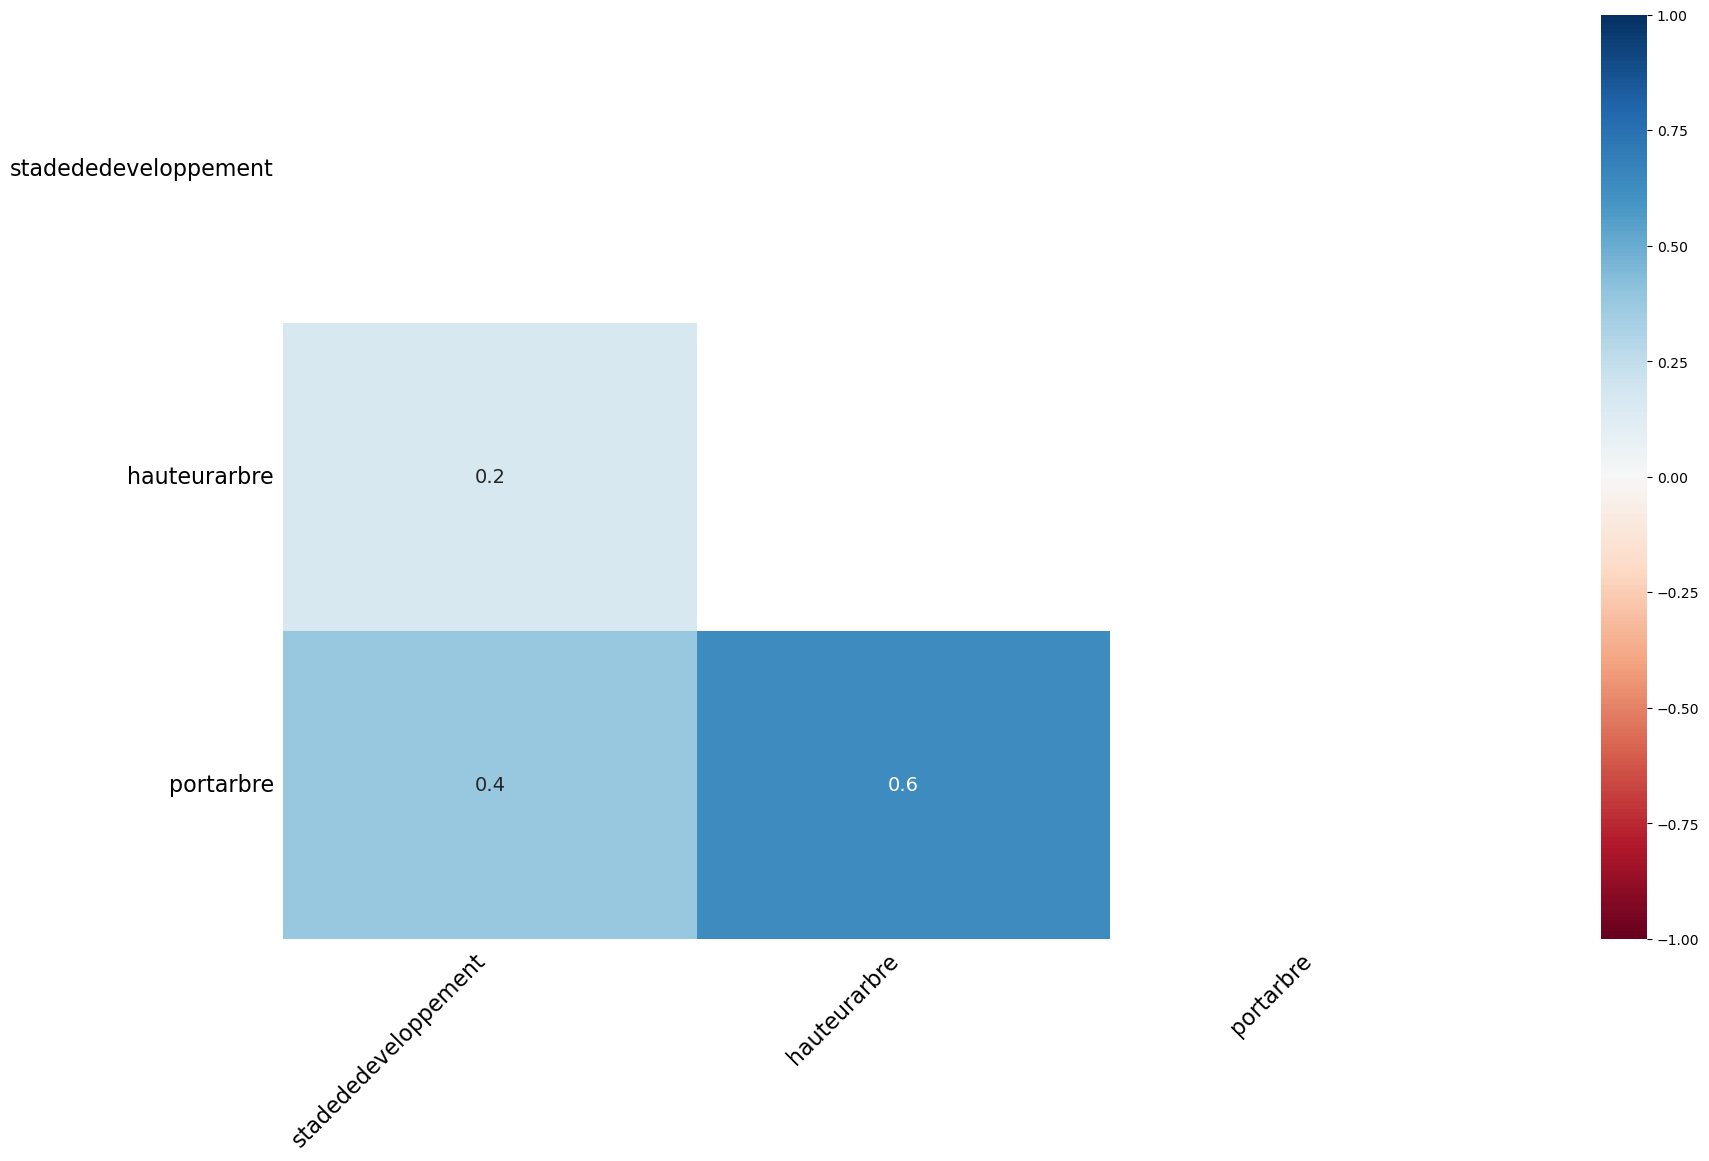

In [8]:
msno.heatmap(df)
plt.show()

## [Optionnel] Comment on peut remplir les valeurs manquantes sans utiliser le pipeline?

In [9]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente pour chaque colonne concernée

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


numeric_features = ['longitude','latitude']
categorical_features = ['sous_categorie','sous_categorie_desc','stadededeveloppement','hauteurarbre','portarbre']

numeric = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
    ('scaler', StandardScaler())
])

categorie = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent", add_indicator=True)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

tranformation = ColumnTransformer(
    transformers=[
        ('numéric', numeric, numeric_features),
        ('catégorie', categorie, categorical_features)
    ])

X_train_processed = tranformation.fit_transform(X_train)
X_test_processed = tranformation.transform(X_test)
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

Shape of processed training data: (23620, 28)
Shape of processed testing data: (5906, 28)


In [29]:
tranformation.get_feature_names_out()

array(['numéric__longitude', 'numéric__latitude',
       'catégorie__sous_categorie_ESP065',
       'catégorie__sous_categorie_ESP151',
       'catégorie__sous_categorie_ESP174',
       'catégorie__sous_categorie_ESP187',
       "catégorie__sous_categorie_desc_Arbre d'enceintes fermées",
       "catégorie__sous_categorie_desc_Arbre d'espaces ouverts",
       'catégorie__sous_categorie_desc_Arbre de voirie',
       'catégorie__sous_categorie_desc_Bois semi naturel',
       'catégorie__stadededeveloppement_Arbre adulte',
       'catégorie__stadededeveloppement_Arbre jeune',
       'catégorie__stadededeveloppement_Arbre vieillissant',
       'catégorie__hauteurarbre_Moins de 10 m',
       'catégorie__hauteurarbre_Plus de 20 m',
       'catégorie__hauteurarbre_de 10 m à 20 m',
       'catégorie__portarbre_Architecturé', 'catégorie__portarbre_Libre',
       'catégorie__portarbre_Pleureur', 'catégorie__portarbre_Pyramidale',
       'catégorie__portarbre_Semi-libre', 'catégorie__portarbre_Têt

## [Optionnel] Création de nouvelles variables (Feature Engineering)

## 3. Création des pipelines de prétraitement

Les pipelines sont essentiels pour :
1. Automatiser les transformations
2. Éviter le data leakage
3. Assurer la cohérence entre train et test

### 3.1 Préparation des données & modèle de base

Nous préparons les données en utilisant un pipeline `scikit-learn` :
- **OneHotEncoder** pour les variables catégorielles
- **StandardScaler** pour les variables numériques
- **LinearRegression** comme modèle de base

In [10]:
X_train_processed

array([[ 1.24884462,  1.25825845,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.96833037,  1.84610089,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.44353438,  0.29362523,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.42297332,  1.13722923,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.32822767,  0.48189972,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.20813624,  0.39019102,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

## 4. Evaluation avec LinearRegression et plusieurs métriques :
- **MAE** (Mean Absolute Error)
- D'autres?

Ce modèle simple nous servira de point de comparaison pour des modèles plus avancés (comme les arbres de décision ou les forêts aléatoires).

In [11]:
 # On peut utiliser scikit-learn 'mean_absolute_error' pour évaluer la performance du modèle de régression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import numpy as np

In [12]:
X_test_processed.shape

(5906, 28)

In [13]:
y_train.shape

(23620,)

In [14]:
result = cross_val_score(LinearRegression(), X_train_processed, y_train, cv=5, scoring='neg_mean_squared_error')

print("score cross val : ", -result.mean())
print("---------------------------------")
rme = np.sqrt(-result.mean())
print("RMSE Régression Linéaire : ", rme)

score cross val :  2.1371142542190257e+23
---------------------------------
RMSE Régression Linéaire :  462289330854.5013


In [2]:
result = cross_val_score(RandomForestRegressor(max_depth=None, max_features=0.7, n_estimators=300, n_jobs=-1), X_test_processed, y_test
                         , cv=5, scoring='neg_mean_squared_error')

print("score cross val : ", -result.mean())
print("---------------------------------")
rme_rf = np.sqrt(-result.mean())
print("RMSE Random Forest Regressor : ", rme_rf)

NameError: name 'cross_val_score' is not defined

In [16]:
result = cross_val_score(DecisionTreeRegressor(random_state=42), X_train_processed, y_train, cv=5, scoring='neg_mean_squared_error')

print("score cross val : ", -result.mean())
print("---------------------------------")
decision = np.sqrt(-result.mean())
print("RMSE Decision Tree Regressor : ", decision)

score cross val :  74.64229466553768
---------------------------------
RMSE Decision Tree Regressor :  8.639577227245422


In [ ]:
result = cross_val_score(SVR(), X_train_processed, y_train, cv=5, scoring='neg_mean_squared_error') #contrôle la robustesse du modèle

print("score cross val : ", -result.mean())
print("---------------------------------")
rme_svr = np.sqrt(-result.mean())
print("RMSE SVR : ", rme_svr)

score cross val :  143.40252038916827
---------------------------------
RMSE SVR :  11.975079139160972


In [18]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 2, 3],
    'max_features': [0.5,0.7,0.2,1.0]
}

In [ ]:
model = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True)

model.fit(X_train_processed, y_train)

x_pred = model.predict(X_train_processed)


print("Best estimators: ", model.best_estimator_)
print("---------------------------------")
print("Best parameters found: ", model.best_params_)
print("---------------------------------")
print("Best cross-validation MSE: ", -model.best_score_)
print("---------------------------------")
print ("CV_results_ :", model.cv_results_)

---------------------------------
Best parameters found:  {'max_depth': None, 'max_features': 0.7, 'n_estimators': 300}
---------------------------------
Best cross-validation MSE:  45.36058350595765
---------------------------------
CV_results_ : {'mean_fit_time': array([11.05984755, 25.4387095 , 35.78605981, 14.58621721, 27.36123242,
       42.50888786,  6.81777205, 13.99145951, 20.40702963,  1.69024005,
        3.37308807,  5.40349545,  2.39983993,  4.45623045,  6.47336507,
        1.07084126,  2.23453627,  3.23211513,  2.9415935 ,  6.17536316,
        9.07752705,  3.91202641,  7.55773535, 11.62437162,  1.6474329 ,
        3.26429763,  4.81977444,  3.88144202,  7.78381896, 11.29083018,
        4.73273768,  9.95011735, 14.57172174,  1.89040504,  3.87095671,
        5.50920305]), 'std_fit_time': array([0.43132584, 0.18649079, 0.95537349, 0.40170391, 0.32589632,
       1.18631169, 0.09348364, 0.06719833, 0.31056976, 0.0546802 ,
       0.14967432, 0.34906953, 0.12655335, 0.15669904, 0.0

In [21]:
cv_results = pd.DataFrame(model.cv_results_)
print(cv_results.describe())

       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
count      36.000000     36.000000        36.000000       36.000000   
mean        9.522009      0.200932         0.198782        0.023747   
std         9.709748      0.245854         0.190084        0.016930   
min         1.070841      0.027021         0.043892        0.002553   
25%         3.345890      0.077335         0.076718        0.009824   
50%         5.842283      0.112524         0.129035        0.020295   
75%        11.374216      0.192044         0.195336        0.034594   
max        42.508888      1.186312         0.738318        0.058893   

       param_max_features  param_n_estimators  split0_test_score  \
count           36.000000           36.000000          36.000000   
mean             0.466667          200.000000        -169.651230   
std              0.208395           82.807867          77.462293   
min              0.200000          100.000000        -260.589011   
25%              0.2

In [22]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.059848,0.431326,0.240025,0.034542,None,0.5,100,"{'max_depth': None, 'max_features': 0.5, 'n_es...",-46.348970,-48.700317,...,-46.797636,1.017206,6,-6.543969,-6.459137,-6.518756,-6.629696,-6.617965,-6.553905,0.063503
1,25.438709,0.186491,0.456048,0.021398,None,0.5,200,"{'max_depth': None, 'max_features': 0.5, 'n_es...",-45.559597,-48.404890,...,-46.199878,1.323046,4,-6.339881,-6.269141,-6.432817,-6.484327,-6.489172,-6.403068,0.085826
2,35.786060,0.955373,0.738318,0.049486,None,0.5,300,"{'max_depth': None, 'max_features': 0.5, 'n_es...",-45.167191,-48.679823,...,-46.312120,1.440808,5,-6.271808,-6.266680,-6.374676,-6.445908,-6.460282,-6.363871,0.082539
3,14.586217,0.401704,0.250542,0.052417,None,0.7,100,"{'max_depth': None, 'max_features': 0.7, 'n_es...",-44.720160,-47.819346,...,-45.549740,1.239774,3,-6.487639,-6.268851,-6.391829,-6.470652,-6.513756,-6.426545,0.088720
4,27.361232,0.325896,0.413006,0.057206,None,0.7,200,"{'max_depth': None, 'max_features': 0.7, 'n_es...",-44.865767,-48.345939,...,-45.482626,1.657851,2,-6.292507,-6.158544,-6.314715,-6.345045,-6.299975,-6.282157,0.064373


In [23]:
cv_results['root_mean_squarred_error'] = np.sqrt(-cv_results['mean_test_score'])
cv_results['root_mean_squarred_error train'] = np.sqrt(-cv_results['mean_train_score'])
cv_results[["mean_test_score","mean_train_score","root_mean_squarred_error","root_mean_squarred_error train"]]

,mean_test_score,mean_train_score,root_mean_squarred_error,root_mean_squarred_error train
0,-46.797636,-6.553905,6.840880,2.560059
1,-46.199878,-6.403068,6.797049,2.530428
2,-46.312120,-6.363871,6.805301,2.522671
3,-45.549740,-6.426545,6.749055,2.535063
4,-45.482626,-6.282157,6.744081,2.506423
5,-45.360584,-6.217792,6.735027,2.493550
6,-49.319869,-6.929153,7.022811,2.632328
7,-49.154457,-6.759797,7.011024,2.599961
8,-49.026077,-6.715159,7.001862,2.591362
9,-246.971658,-246.836120,15.715332,15.711019


In [24]:
cv_results['difference'] = cv_results['root_mean_squarred_error train'] - cv_results['root_mean_squarred_error']
cv_results[["mean_test_score","mean_train_score","root_mean_squarred_error","root_mean_squarred_error train","difference"]]

,mean_test_score,mean_train_score,root_mean_squarred_error,root_mean_squarred_error train,difference
0,-46.797636,-6.553905,6.840880,2.560059,-4.280820
1,-46.199878,-6.403068,6.797049,2.530428,-4.266621
2,-46.312120,-6.363871,6.805301,2.522671,-4.282630
3,-45.549740,-6.426545,6.749055,2.535063,-4.213992
4,-45.482626,-6.282157,6.744081,2.506423,-4.237658
5,-45.360584,-6.217792,6.735027,2.493550,-4.241477
6,-49.319869,-6.929153,7.022811,2.632328,-4.390482
7,-49.154457,-6.759797,7.011024,2.599961,-4.411063
8,-49.026077,-6.715159,7.001862,2.591362,-4.410500
9,-246.971658,-246.836120,15.715332,15.711019,-0.004313


In [25]:
cv_results[['rank_test_score','root_mean_squarred_error']]

,rank_test_score,root_mean_squarred_error
0,6,6.840880
1,4,6.797049
2,5,6.805301
3,3,6.749055
4,2,6.744081
5,1,6.735027
6,9,7.022811
7,8,7.011024
8,7,7.001862
9,28,15.715332


In [26]:
cv_results['root_mean_squarred_error']

0      6.840880
1      6.797049
2      6.805301
3      6.749055
4      6.744081
5      6.735027
6      7.022811
7      7.011024
8      7.001862
9     15.715332
10    15.747896
11    15.734336
12    15.995904
13    15.982359
14    15.968689
15    16.084409
16    16.101047
17    16.083111
18    13.853913
19    13.882773
20    13.871288
21    13.880563
22    13.880854
23    13.887162
24    14.553790
25    14.576553
26    14.558452
27    13.140767
28    13.141214
29    13.141142
30    13.168808
31    13.166405
32    13.165735
33    13.607649
34    13.608551
35    13.589581
Name: root_mean_squarred_error, dtype: float64

In [1]:
data_pred = pd.DataFrame({
    'Actual': y_test.round(2),
    'Predicted': X_test_processed.round(2)
})
data_pred

NameError: name 'pd' is not defined

In [ ]:
data_pred

,Actual,Predicted
15390,1987.0,1986.68
5769,2009.0,2009.94
5715,1965.0,1965.00
3481,1983.0,1985.32
16950,1970.0,1970.00
...,...,...
7587,1970.0,1970.19
7525,1981.0,1981.00
14729,1965.0,1966.14
25883,1999.0,1999.00


In [ ]:
data_arbres["anneedeplantation"]

0        2015.0
1        2015.0
2        2015.0
3        2015.0
4        2015.0
          ...  
31665    2018.0
31666    2018.0
31667       NaN
31668       NaN
31669       NaN
Name: anneedeplantation, Length: 31670, dtype: float64

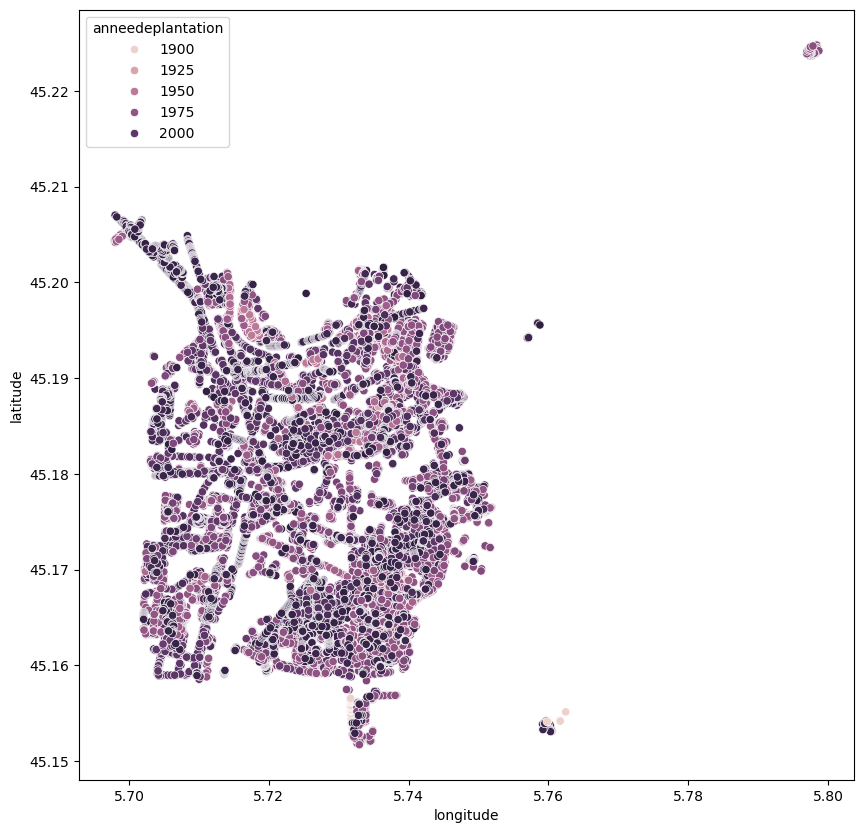

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="longitude", y="latitude", hue="anneedeplantation",
                     data=df, ax=ax)
plt.show()

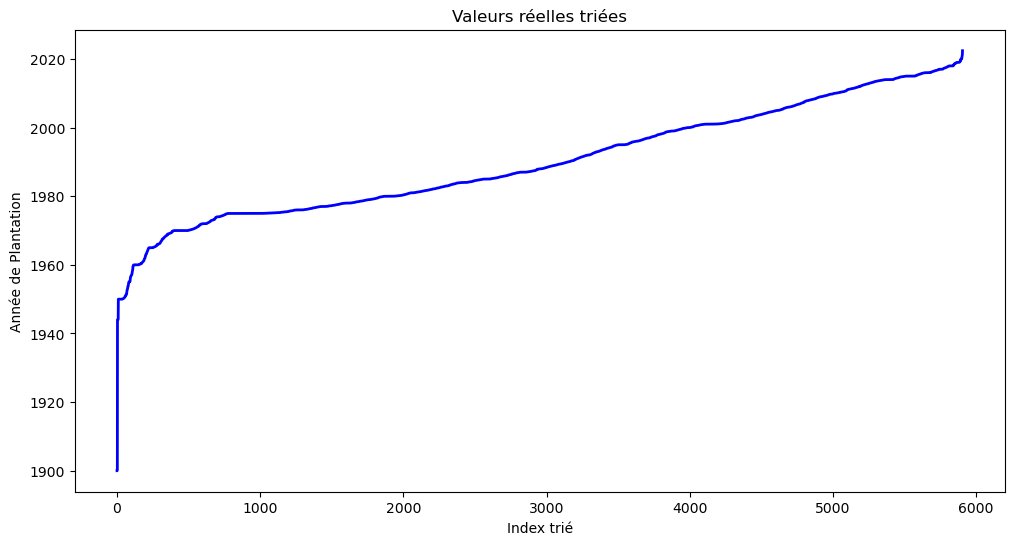

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(sorted(data_pred['Predicted']), color='blue', linewidth=2)
plt.xlabel("Index trié")
plt.ylabel("Année de Plantation")
plt.title("Valeurs réelles triées")
plt.show()

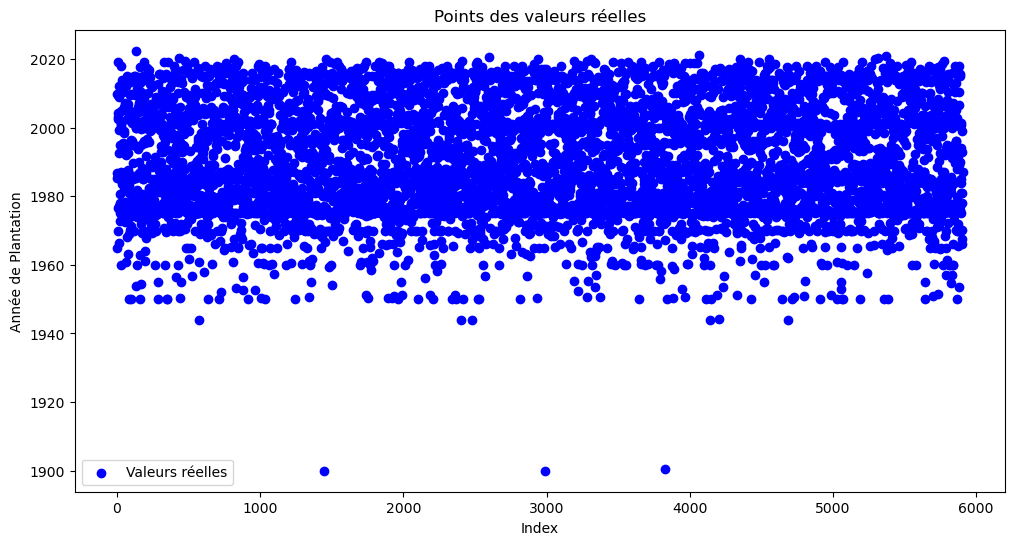

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(data_pred)), data_pred['Predicted'], color='blue', label="Valeurs réelles")
plt.xlabel("Index")
plt.ylabel("Année de Plantation")
plt.title("Points des valeurs réelles")
plt.legend()
plt.show()

## 5. Visualisation des prédictions

Visualisons la relation entre les valeurs réelles et prédites :

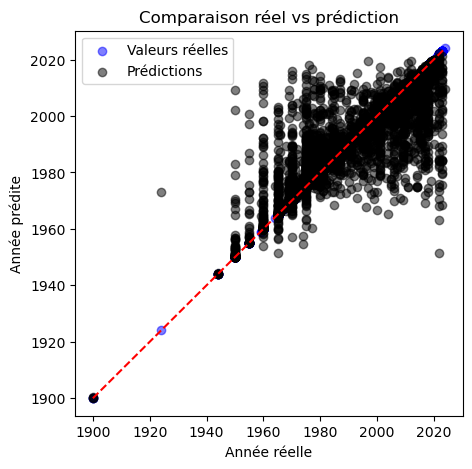

In [ ]:
# Code

plt.figure(figsize=(5,5))

# Points réels
plt.scatter(y_test, y_test,
            alpha=0.5, color='blue', label='Valeurs réelles')

# Points prédits
plt.scatter(y_test, data_pred['Predicted'],
            alpha=0.5, color='black', label='Prédictions')

# Ligne diagonale
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', color='red')

plt.xlabel("Année réelle")
plt.ylabel("Année prédite")
plt.title("Comparaison réel vs prédiction")
plt.legend()
plt.show()

## Conclusion

In [ ]:
data_pred["diff"] = (data_pred["Actual"] - data_pred["Predicted"]).abs().round(2)
data_pred

,Actual,Predicted,diff
15390,1987.0,1986.68,0.32
5769,2009.0,2009.94,0.94
5715,1965.0,1965.00,0.00
3481,1983.0,1985.32,2.32
16950,1970.0,1970.00,0.00
...,...,...,...
7587,1970.0,1970.19,0.19
7525,1981.0,1981.00,0.00
14729,1965.0,1966.14,1.14
25883,1999.0,1999.00,0.00


In [ ]:
data_pred.loc[(data_pred["Actual"] - data_pred["Predicted"]).abs().idxmax()]

Actual       2022.00
Predicted    1951.34
diff           70.66
Name: 26403, dtype: float64

In [ ]:
data_pred.loc[(data_pred["Actual"] - data_pred["Predicted"]).abs().idxmin()]

Actual       1965.0
Predicted    1965.0
diff            0.0
Name: 5715, dtype: float64

In [ ]:
data_pred[data_pred['Actual'] > data_pred['Predicted']]

,Actual,Predicted,diff
15390,1987.0,1986.68,0.32
14884,2004.0,2003.21,0.79
23460,2005.0,2004.30,0.70
28030,2001.0,1992.47,8.53
2167,2001.0,1999.37,1.63
...,...,...,...
18713,2015.0,2014.94,0.06
24182,2001.0,2000.90,0.10
13669,2002.0,1994.10,7.90
13778,2006.0,2001.40,4.60


In [ ]:
data_pred

,Actual,Predicted,diff
15390,1987.0,1986.68,0.32
5769,2009.0,2009.94,0.94
5715,1965.0,1965.00,0.00
3481,1983.0,1985.32,2.32
16950,1970.0,1970.00,0.00
...,...,...,...
7587,1970.0,1970.19,0.19
7525,1981.0,1981.00,0.00
14729,1965.0,1966.14,1.14
25883,1999.0,1999.00,0.00
